In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import data_table
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.display.float_format = '{:.1f}'.format

# PART 1 : DATA CLEANING

In [32]:
ds = pd.read_csv('movies.csv')

print( ds.head(10).to_string())

print("Total Dimensions : " + str(ds.shape))
print("Missing values in each Column : \n")
print( ds.isna().sum().to_string() )
ds = ds.drop_duplicates()
# convert the votes column to numeric
ds['VOTES'] = pd.to_numeric(ds['VOTES'].str.replace(',',""))
# drop genre na values and drop gross column
ds = ds.dropna(subset=['GENRE'])
ds = ds.drop(columns=['Gross','STARS'])
ds['GENRE'] = ds['GENRE'].str.replace('\n','')
ds['ONE-LINE'] = ds['ONE-LINE'].str.replace('\n','')
ds = ds.assign(GENRE=ds['GENRE'].str.split(','))

                                MOVIES         YEAR                                       GENRE  RATING                                                                                                                                                                                                               ONE-LINE                                                                                                                                 STARS    VOTES  RunTime Gross
0                        Blood Red Sky       (2021)      \nAction, Horror, Thriller                 6.1                                                                               \nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.              \n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n   21,062    121.0   NaN
1  Masters of the Universe: Revelation     (20

We use datacleaning now to clean the dataset.
For the genre column we will drop all na values
For the rating , Runtime and votes columns we will replace the values with the median of the respective column
In the gross column , most of the values are missing so we will choose to remove the column
For the year column , we use backfill since years have interval so it is not possible to find the median

In [29]:
# cds is our clean dataset
cds = ds.copy()
cds['RATING'] = cds['RATING'].fillna( ds['RATING'].median() )
#use backfill on year column
cds['YEAR'] = cds['YEAR'].bfill()
cds['VOTES'] = cds['VOTES'].fillna( ds['VOTES'].median() )
cds['RunTime'] = cds['RunTime'].fillna( ds['RunTime'].median() )
missing_count = cds.isna().sum()
print( "Missing values in each column : ")
print( missing_count )

Missing values in each column : 
MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
VOTES       0
RunTime     0
dtype: int64


Now we remove any duplicates from this dataset

In [7]:
print("Dimensions before removing duplicates : ")
print( cds.shape )
print( "Dimensions after removing duplicates : ")
print( cds.shape )

Dimensions before removing duplicates : 
(9490, 7)
Dimensions after removing duplicates : 
(9490, 7)


In [8]:
cds['Z-Score'] = (cds['VOTES'] - cds['VOTES'].mean()) / cds['VOTES'].std()
outliers = cds[np.abs(cds['Z-Score']) > 3]
outliers.head(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Z-Score
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller ]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,13.4
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy ]",9.2,An animated series that follows the exploits o...,414849.0,23.0,6.2
7,Dexter,(2006–2013),"[Crime, Drama, Mystery ]",8.6,"By day, mild-mannered Dexter is a blood-spatte...",665387.0,53.0,10.0
11,Lucifer,(2016–2021),"[Crime, Drama, Fantasy ]",8.1,Lucifer Morningstar has decided he's had enoug...,264222.0,42.0,3.8
14,American Horror Story,(2011– ),"[Drama, Horror, Thriller ]",8.0,An anthology series centering on different cha...,286488.0,60.0,4.2
15,Grey's Anatomy,(2005– ),"[Drama, Romance ]",7.5,A drama centered on the personal and professio...,266258.0,41.0,3.9
16,Breaking Bad,(2008–2013),"[Crime, Drama, Thriller ]",9.4,A high school chemistry teacher diagnosed with...,1552311.0,49.0,23.6
19,Stranger Things,(2016– ),"[Drama, Fantasy, Horror ]",8.7,"When a young boy disappears, his mother, a pol...",885856.0,51.0,13.4
21,Friends,(1994–2004),"[Comedy, Romance ]",8.9,Follows the personal and professional lives of...,880918.0,22.0,13.3
22,The Flash,(2014– ),"[Action, Adventure, Drama ]",7.6,"After being struck by lightning, Barry Allen w...",320264.0,43.0,4.7


Removing outliers here does not make sense since it will remove all the popular movies.

# PART 2 : EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS


In [9]:
# Summary statistics for numerical variables
stats = {}
columns = ['VOTES', 'RATING', 'RunTime']

for col in columns:
    stats[col] = {
        'mean': cds[col].mean(),
        'median': cds[col].median(),
        'mode': cds[col].mode()[0],
        'variance': cds[col].var(),
        'skewness': cds[col].skew(),
        'kurtosis': cds[col].kurtosis()
    }

stats_df = pd.DataFrame(stats)
stats_df

,VOTES,RATING,RunTime
mean,13146.4,6.9,66.5
median,796.0,7.1,60.0
mode,796.0,7.1,60.0
variance,4254004907.1,1.3,1664.4
skewness,12.4,-0.8,4.4
kurtosis,221.6,1.2,44.2


Histrograms , boxplots and bar plots for the data

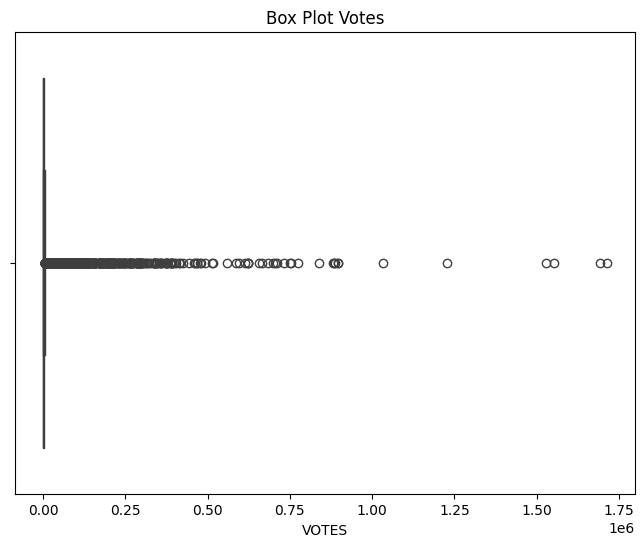

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cds['VOTES'])
plt.title("Box Plot Votes")
plt.show()

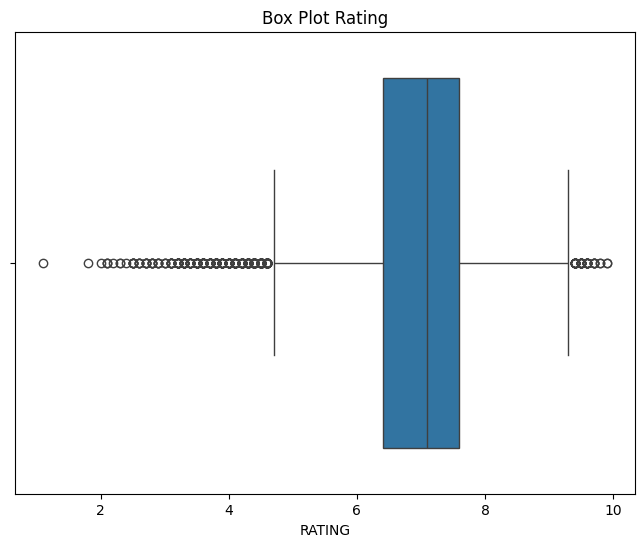

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cds['RATING'])
plt.title("Box Plot Rating")
plt.show()

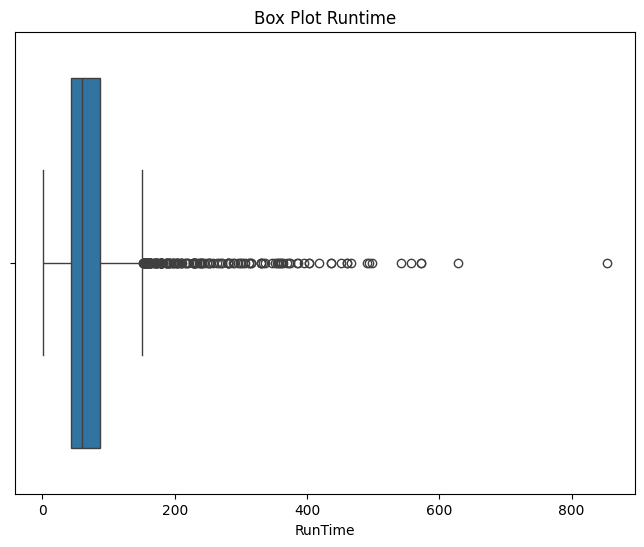

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cds['RunTime'])
plt.title("Box Plot Runtime")
plt.show()

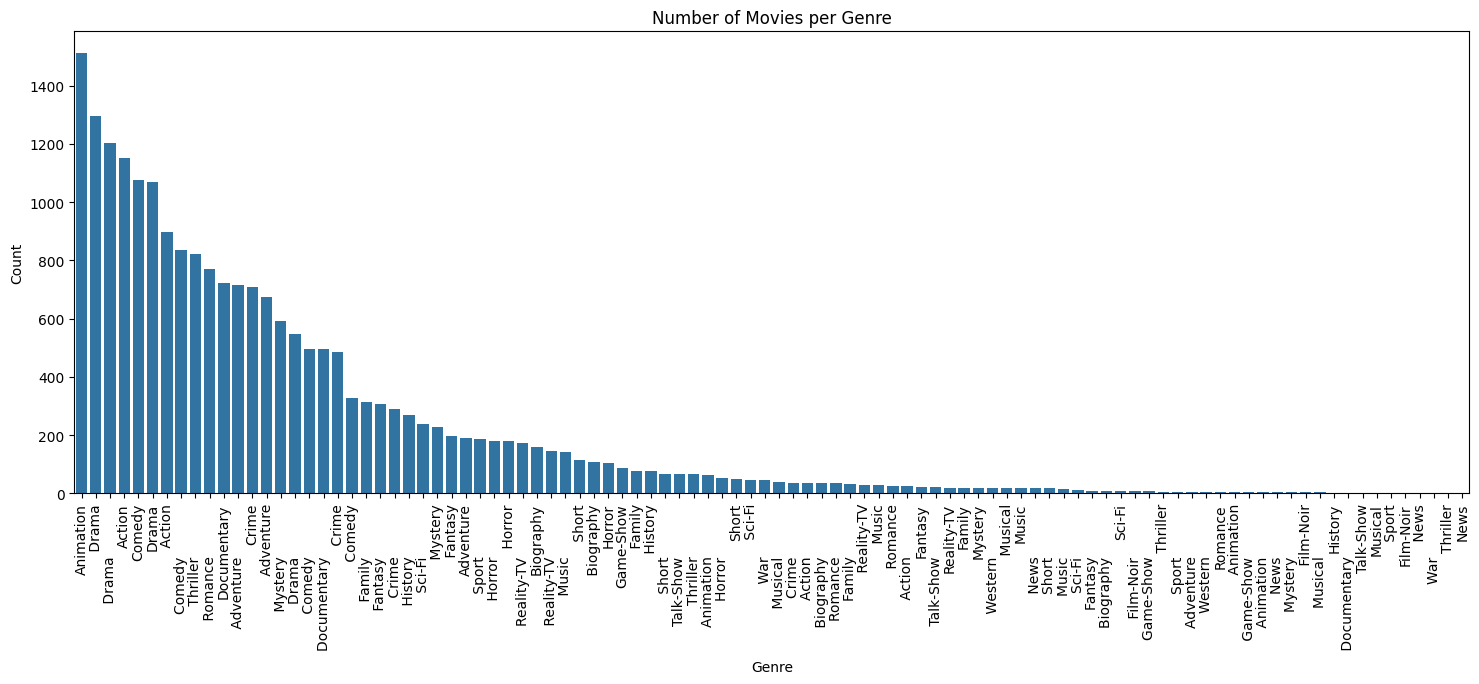

In [23]:
from collections import defaultdict
genre_count = defaultdict(int)
for entry in cds['GENRE']:
    for genre in entry:
        genre_count[genre] += 1
genre_count = dict(sorted(genre_count.items(), key=lambda item: item[1], reverse=True))
genre_df = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])
plt.figure(figsize=(18, 6))  # Adjust figure size as needed
sns.barplot(x='Genre', y='Count', data=genre_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Number of Movies per Genre')
plt.show()

To analyse the year column we first need to convert the year values to intervals

In [43]:
def convert_year_interval(year):
    year = year.strip("()")  # Remove parentheses
    # Handling both hyphen and en dash as delimiters
    if '–' in year:
        start, _, end = year.partition('–')  # Split at en dash
    elif '-' in year:
        start, _, end = year.partition('-')  # Split at hyphen
    else:  # Handle cases with single year or unexpected format
        start = year.strip()  # Get the year string and strip whitespace
        end = ''  # Set end as empty string

    start = int(start) if start.isdigit() else np.nan  # Convert start to int or NaN
    end = int(end) if end.isdigit() else np.inf  # Convert end to int or infinity

    return (start, end)

# Apply transformation
cds['Year_interval'] = cds['YEAR'].apply(convert_year_interval)

cds.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Year_interval
0,Blood Red Sky,(2021),"[Action, Horror, Thriller ]",6.1,A woman with a mysterious illness is forced in...,21062.0,121.0,"(2021, inf)"
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure ]",5.0,The war for Eternia begins again in what may b...,17870.0,25.0,"(2021, inf)"
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller ]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,"(2010, 2022)"
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy ]",9.2,An animated series that follows the exploits o...,414849.0,23.0,"(2013, inf)"
4,Army of Thieves,(2021),"[Action, Crime, Horror ]",7.1,"A prequel, set before the events of Army of th...",796.0,60.0,"(2021, inf)"
5,Outer Banks,(2020– ),"[Action, Crime, Drama ]",7.6,A group of teenagers from the wrong side of th...,25858.0,50.0,"(2020, inf)"
6,The Last Letter from Your Lover,(2021),"[Drama, Romance ]",6.8,A pair of interwoven stories set in the past a...,5283.0,110.0,"(2021, inf)"
7,Dexter,(2006–2013),"[Crime, Drama, Mystery ]",8.6,"By day, mild-mannered Dexter is a blood-spatte...",665387.0,53.0,"(2006, 2013)"
8,Never Have I Ever,(2020– ),[Comedy ],7.9,The complicated life of a modern-day first gen...,34530.0,30.0,"(2020, inf)"
9,Virgin River,(2019– ),"[Drama, Romance ]",7.4,"Seeking a fresh start, nurse practitioner Meli...",27279.0,44.0,"(2019, inf)"


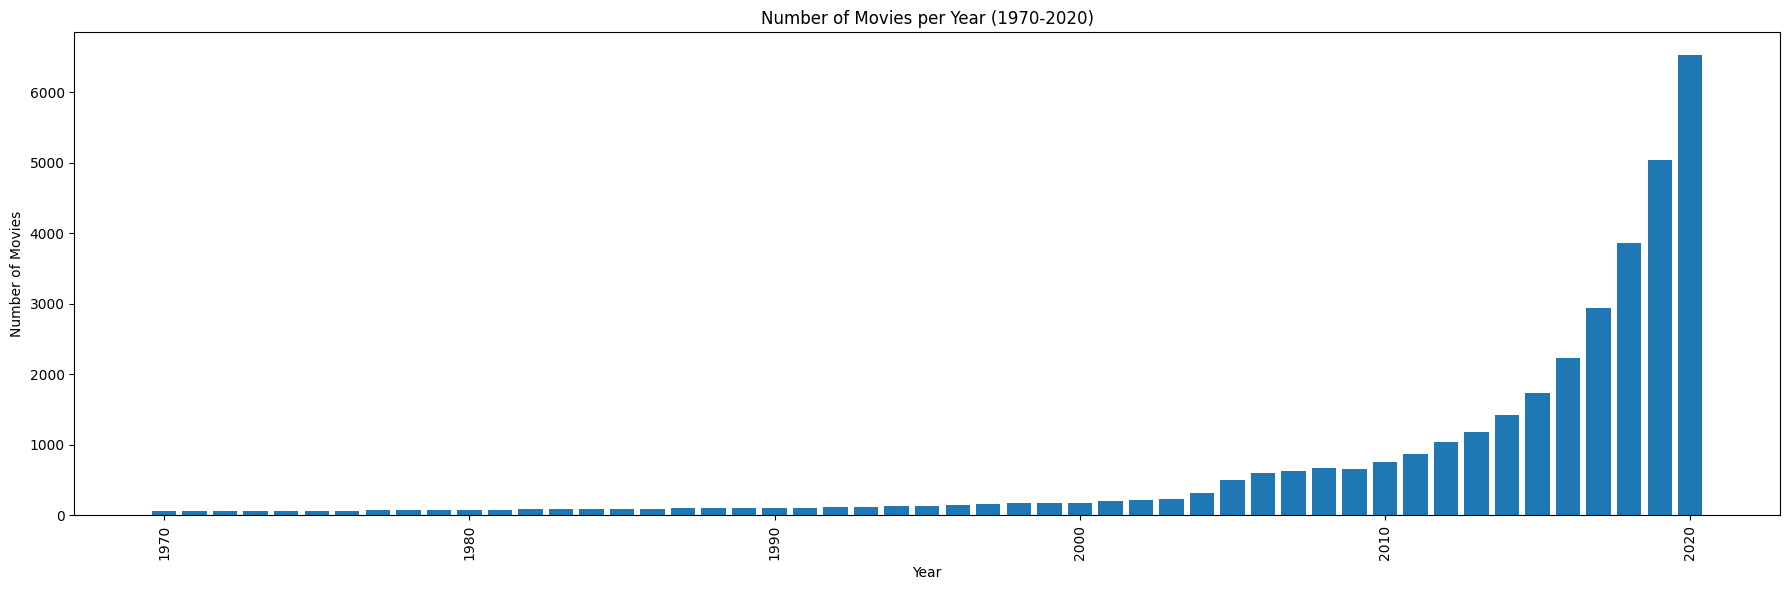

In [25]:
from collections import defaultdict
# Create a dictionary to store the movie count for each year
year_counts = {}

# Iterate through the DataFrame
for index, row in cds.iterrows():
    start_year, end_year = row['Year_interval']

    # Handle intervals like (2019, inf)
    if end_year == float('inf'):
        end_year = 2020

    if pd.isnull(start_year) or pd.isnull(end_year):
      continue

    # Update movie count for each year within the interval
    for year in range(int(start_year), int(end_year) + 1):
        if 1970 <= year <= 2020:  # Consider only years between 1970 and 2020
            year_counts[year] = year_counts.get(year, 0) + 1

# Create a DataFrame for plotting
year_counts_df = pd.DataFrame(list(year_counts.items()), columns=['Year', 'Count'])

# Create the bar graph
plt.figure(figsize=(18, 6))  # Adjust figure size as needed
plt.bar(year_counts_df['Year'], year_counts_df['Count'])
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year (1970-2020)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## BIVARIATE ANALYSIS

Rating Vs Votes plot

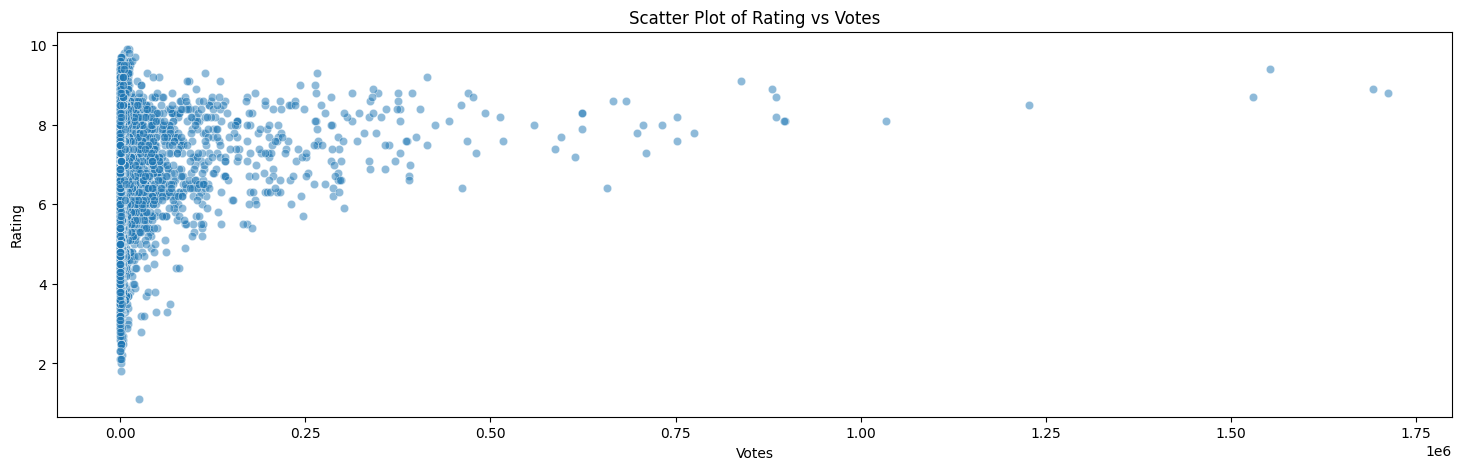

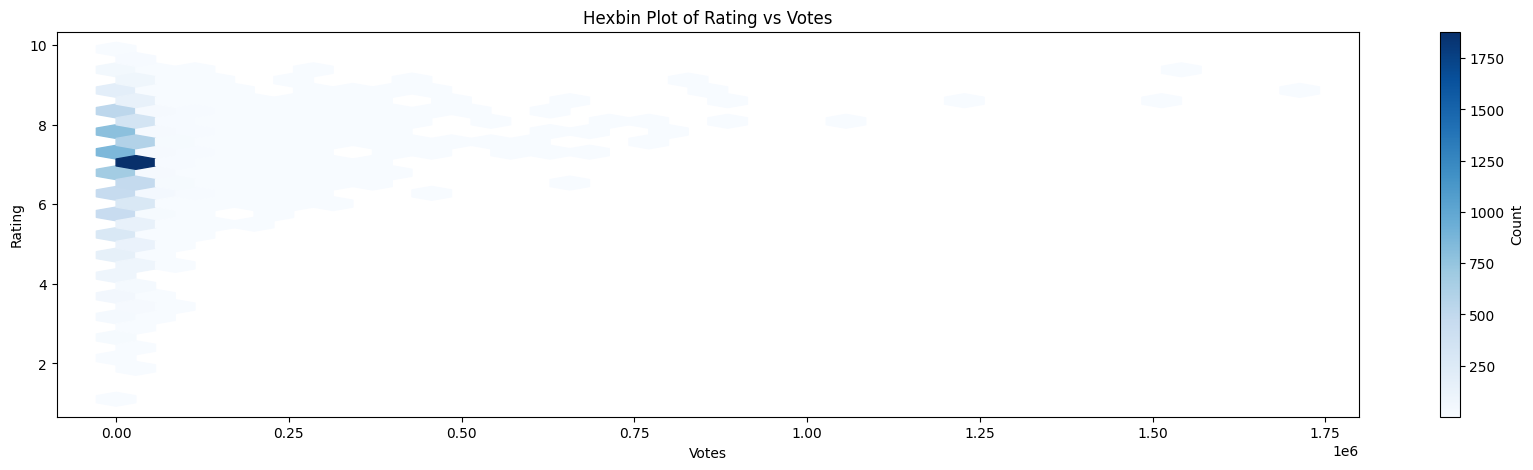

In [39]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=cds['VOTES'], y=cds['RATING'], alpha=0.5)
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Scatter Plot of Rating vs Votes")
plt.show()

plt.figure(figsize=(21, 5))
plt.hexbin(cds['VOTES'], cds['RATING'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Hexbin Plot of Rating vs Votes")
plt.show()


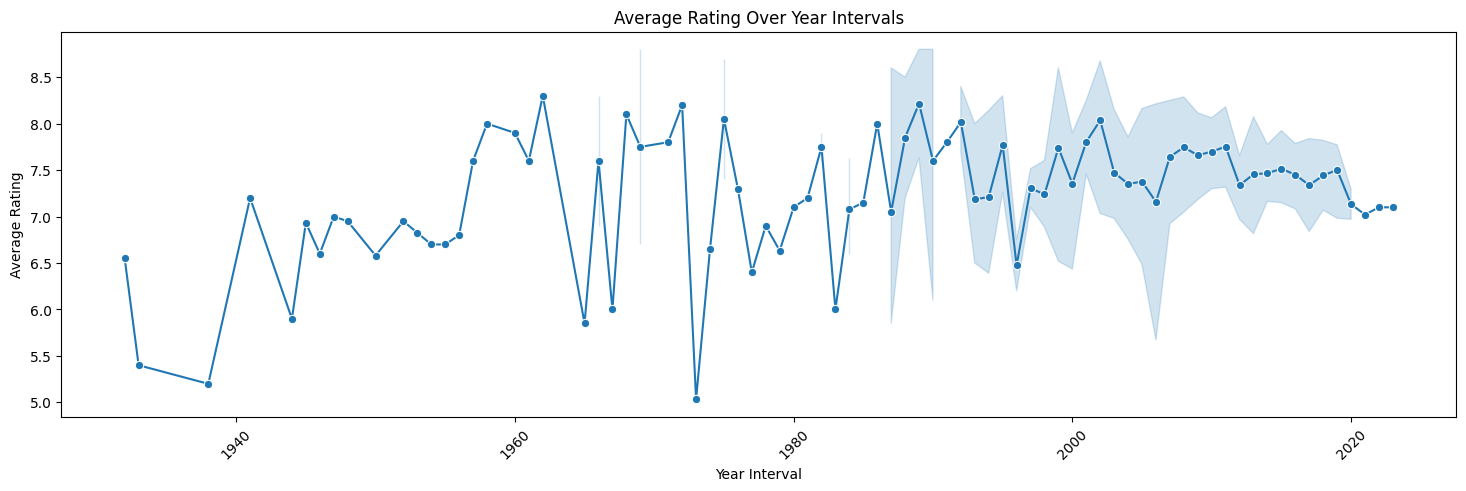

In [48]:
df_grouped = cds.groupby('Year_interval')['RATING'].mean().reset_index()

# Extract start years for x-axis
df_grouped['Start_Year'] = [year[0] for year in df_grouped['Year_interval']]

plt.figure(figsize=(18, 5))
sns.lineplot(x=df_grouped['Start_Year'], y=df_grouped['RATING'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Year Interval")
plt.ylabel("Average Rating")
plt.title("Average Rating Over Year Intervals")
plt.show()
df_grouped['Start_Year'] = [year[0] for year in df_grouped['Year_interval']]


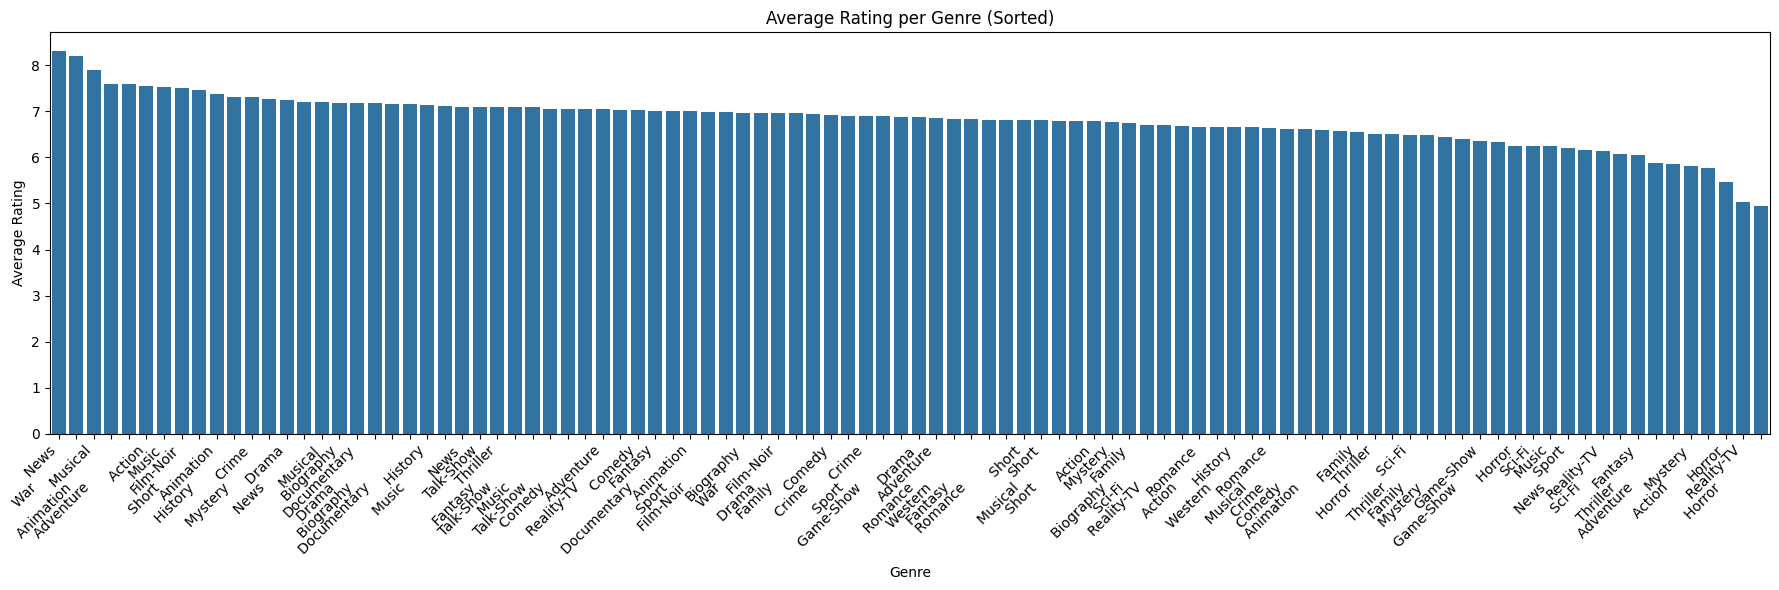

In [54]:
exploded_genres = cds.explode('GENRE')
exploded_genres = exploded_genres[exploded_genres['GENRE'] != '']
exploded_genres = exploded_genres.dropna(subset=['GENRE'])

# Calculate average rating per genre
avg_ratings = exploded_genres.groupby('GENRE')['RATING'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(18, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating per Genre (Sorted)")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

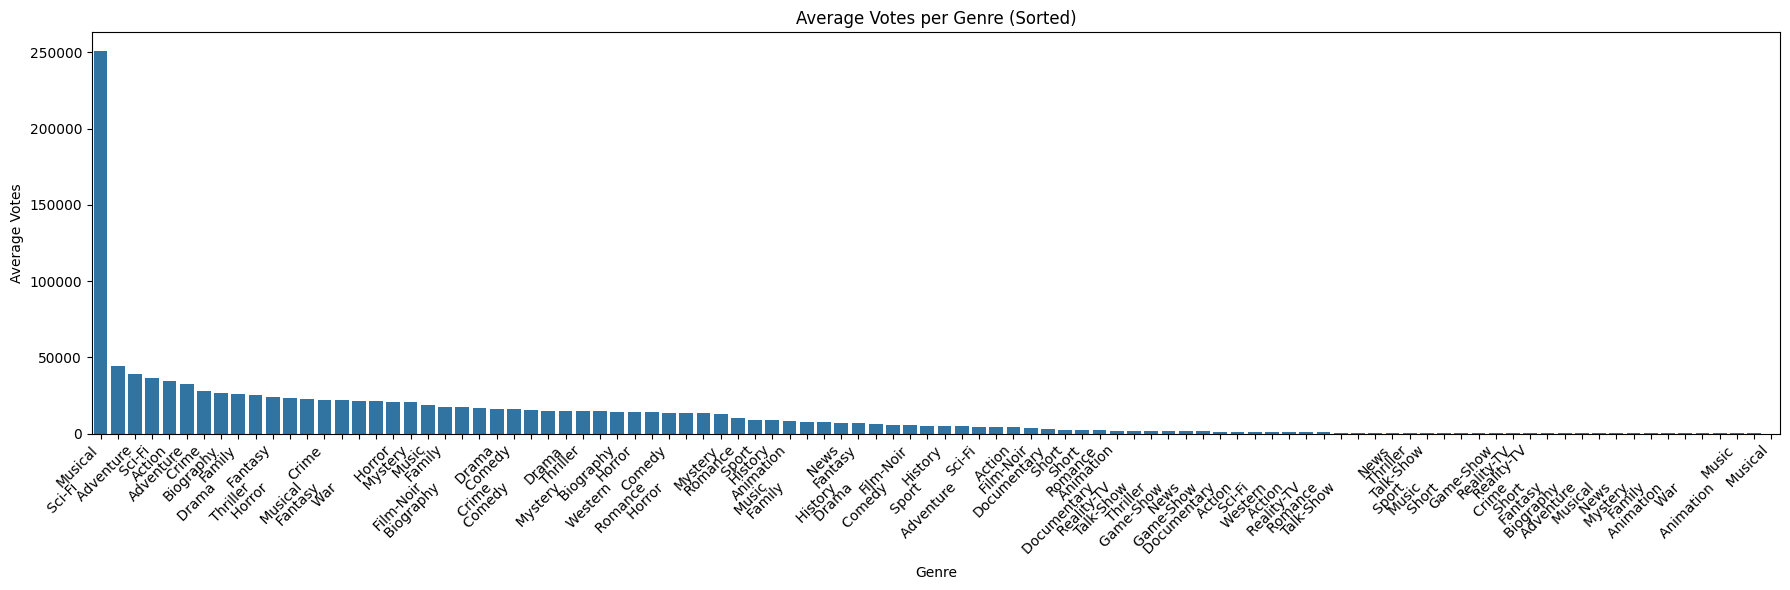

In [57]:
avg_votes_per_genre = exploded_genres.groupby('GENRE')['VOTES'].mean().reset_index()
sorted_avg_votes = avg_votes_per_genre.sort_values(by=['VOTES'], ascending=False)
plt.figure(figsize=(18, 6))
sns.barplot(x='GENRE', y='VOTES', data=sorted_avg_votes)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Average Votes")
plt.title("Average Votes per Genre (Sorted)")
plt.tight_layout()
plt.show()

<ipython-input-64-99790b718887>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_runtime = cds.groupby('Year_Group')['RunTime'].mean().reset_index()


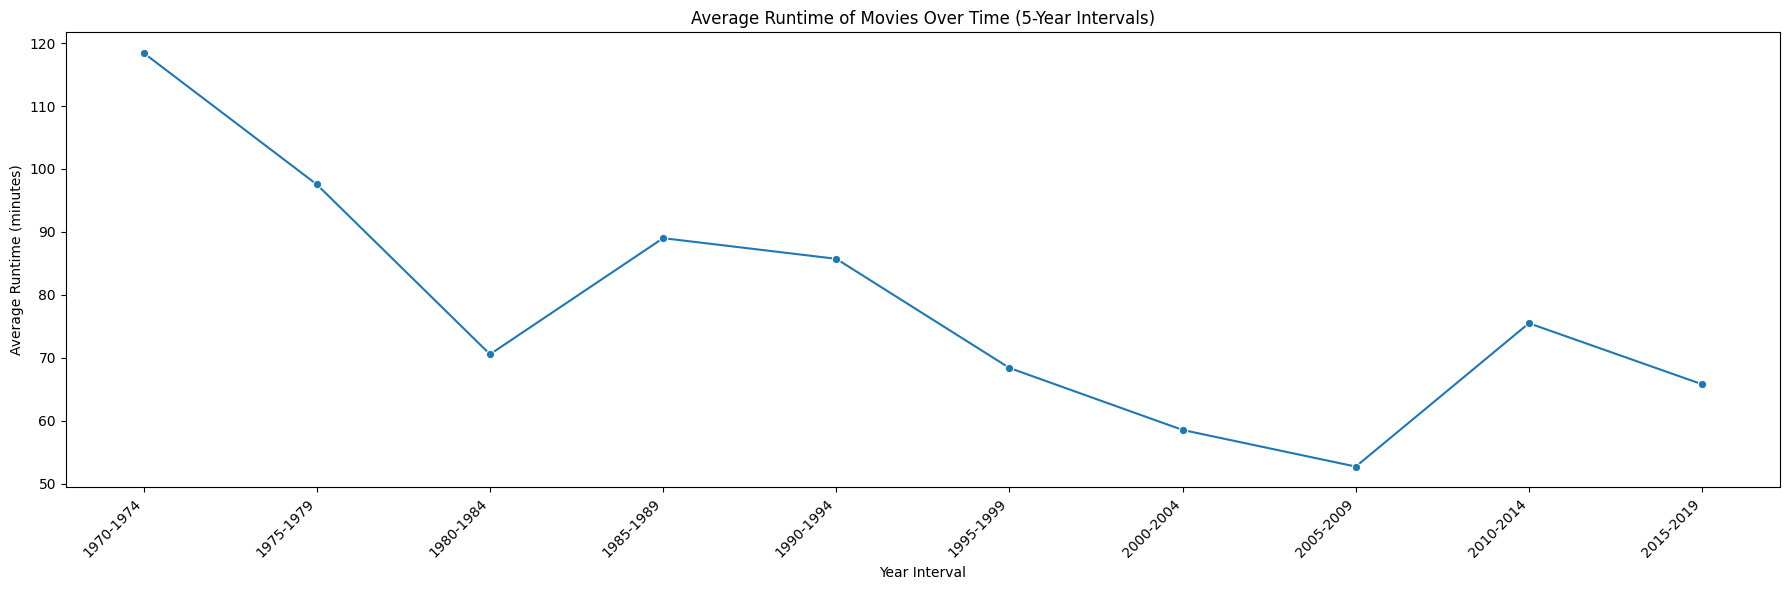

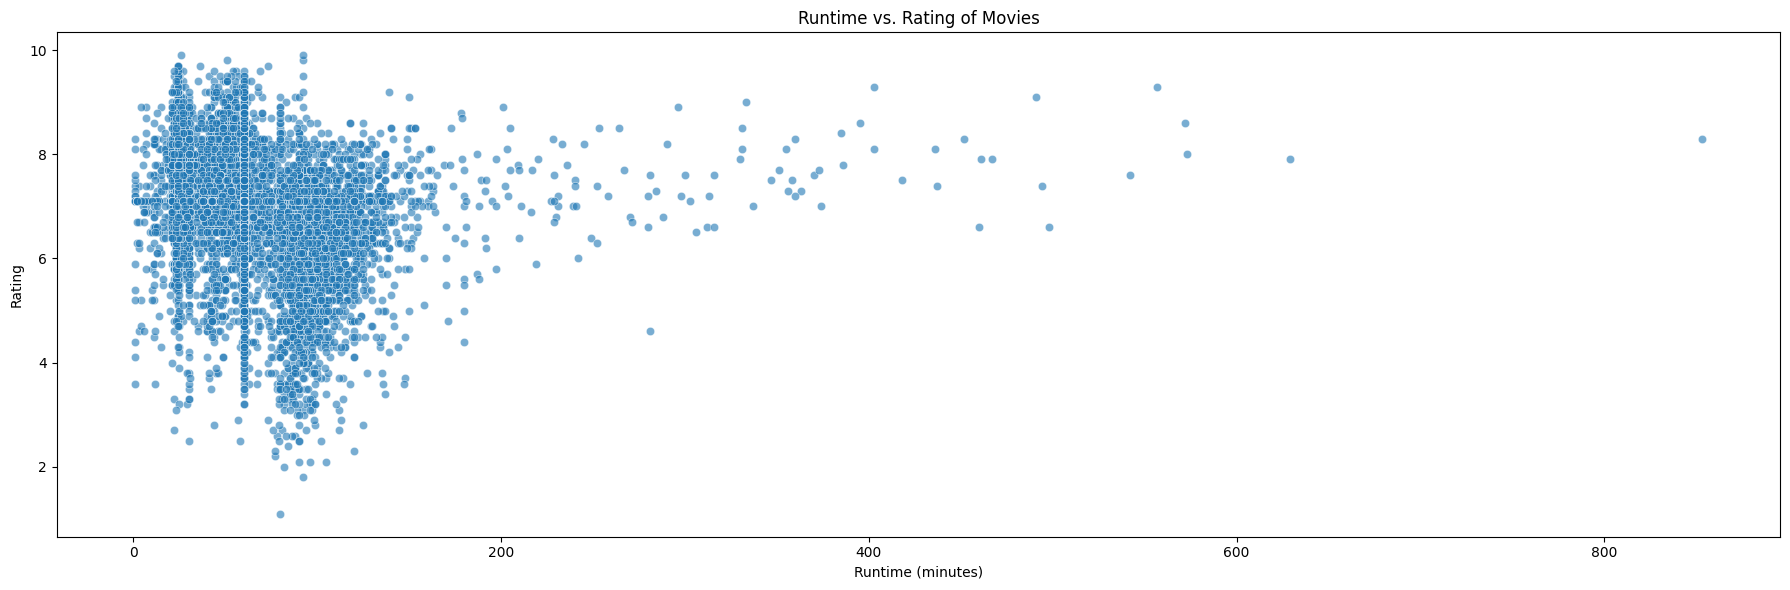

In [64]:
# Replace 'inf' with a suitable end year (e.g., 2023)
cds['Year_interval'] = cds['Year_interval'].apply(lambda x: (x[0], 2023) if x[1] == float('inf') else x)

# Create 5-year intervals
bins = range(1970, 2024, 5)  # Assuming data starts from 1970
labels = [f'{i}-{i + 4}' for i in bins[:-1]]

cds['Year_Group'] = pd.cut([x[0] for x in cds['Year_interval']], bins=bins, labels=labels, right=False)

# Calculate average runtime for each 5-year interval
year_runtime = cds.groupby('Year_Group')['RunTime'].mean().reset_index()

# Rename columns for clarity
year_runtime.columns = ['Year Interval', 'Average Runtime']
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year Interval', y='Average Runtime', data=year_runtime, marker='o')
plt.title('Average Runtime of Movies Over Time (5-Year Intervals)')
plt.xlabel('Year Interval')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
sns.scatterplot(x='RunTime', y='RATING', data=cds, alpha=0.6)  # alpha for transparency
plt.title('Runtime vs. Rating of Movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

## MULTIVARIATE ANALYSIS

<ipython-input-66-547d9f7d935a>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = exploded_genres.groupby(['GENRE', 'Year_Group'])['RATING'].mean().unstack()


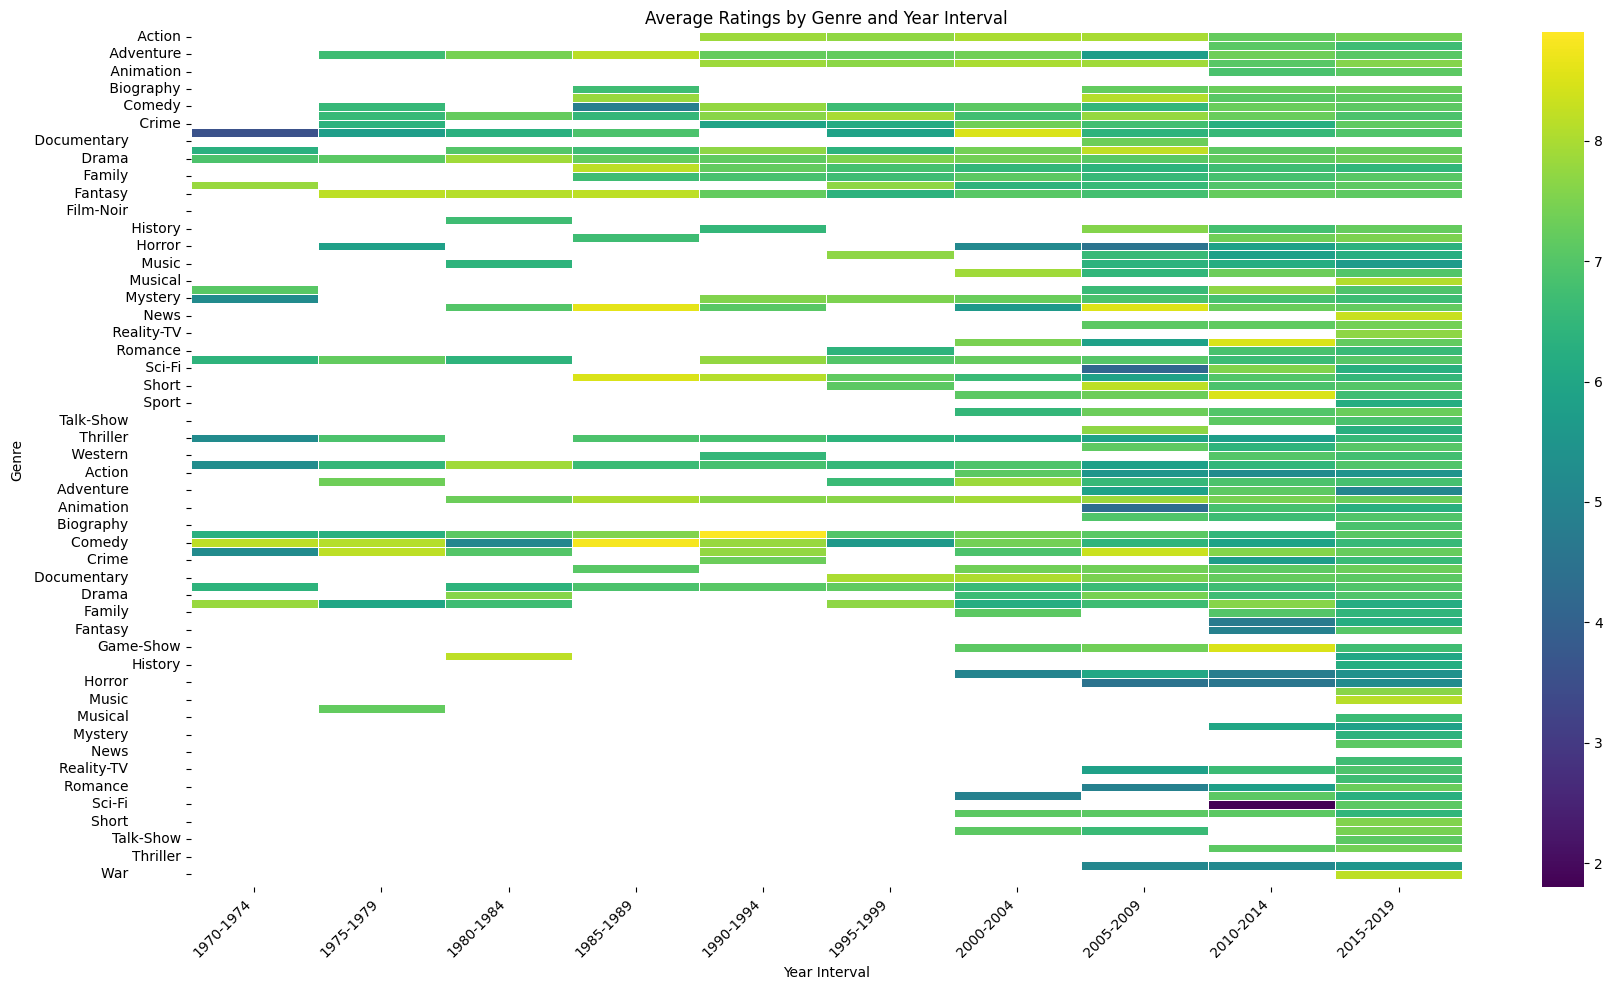

In [66]:
exploded_genres = cds.explode('GENRE')
exploded_genres = exploded_genres[exploded_genres['GENRE'] != '']
exploded_genres = exploded_genres.dropna(subset=['GENRE'])

exploded_genres['Year_interval'] = exploded_genres['Year_interval'].apply(lambda x: (x[0], 2023) if x[1] == float('inf') else x)

bins = range(1970, 2024, 5)
labels = [f'{i}-{i + 4}' for i in bins[:-1]]
exploded_genres['Year_Group'] = pd.cut([x[0] for x in exploded_genres['Year_interval']], bins=bins, labels=labels, right=False)

heatmap_data = exploded_genres.groupby(['GENRE', 'Year_Group'])['RATING'].mean().unstack()

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Average Ratings by Genre and Year Interval')
plt.xlabel('Year Interval')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-68-6cd083bef159>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = exploded_genres.groupby(['GENRE', 'Year_Group'])[['RATING', 'RunTime']].mean().reset_index()


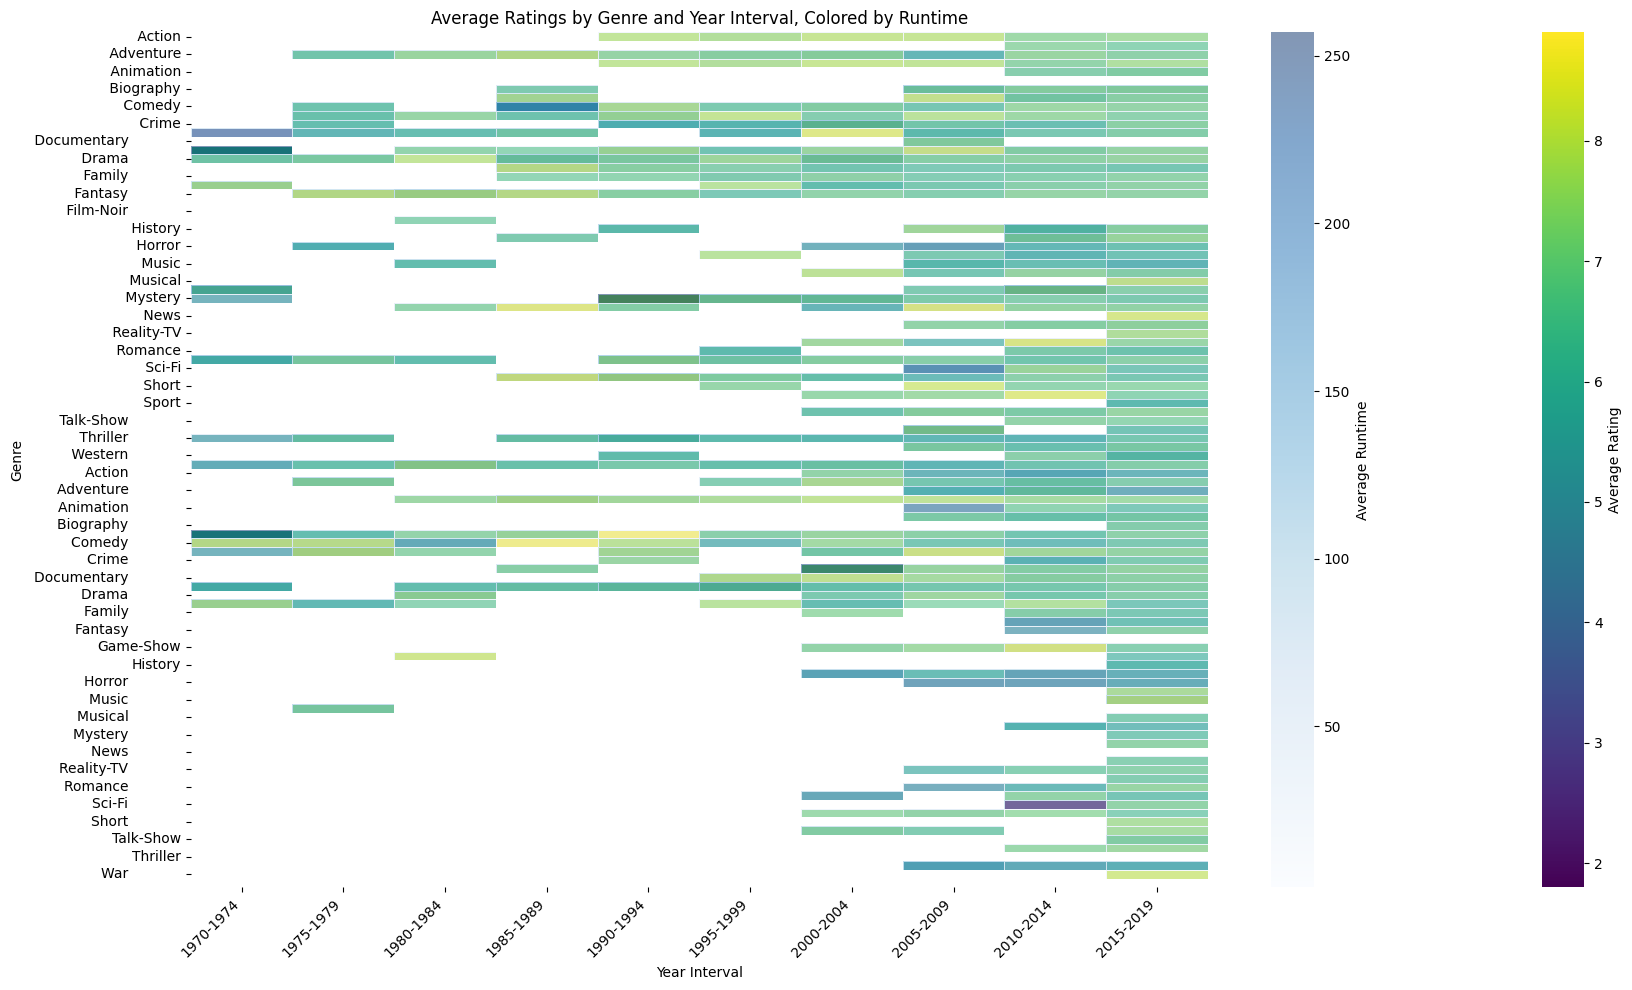

In [68]:
# Calculate average rating and runtime for each genre and year interval
heatmap_data = exploded_genres.groupby(['GENRE', 'Year_Group'])[['RATING', 'RunTime']].mean().reset_index()

heatmap_matrix = heatmap_data.pivot(index='GENRE', columns='Year_Group', values='RATING')
runtime_matrix = heatmap_data.pivot(index='GENRE', columns='Year_Group', values='RunTime')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_matrix, annot=False, cmap='viridis', fmt=".1f", linewidths=.5,
            cbar_kws={'label': 'Average Rating'})

sns.heatmap(runtime_matrix, annot=False, cmap='Blues', alpha=0.5,
            cbar_kws={'label': 'Average Runtime'}, ax=plt.gca())

plt.title('Average Ratings by Genre and Year Interval, Colored by Runtime')
plt.xlabel('Year Interval')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


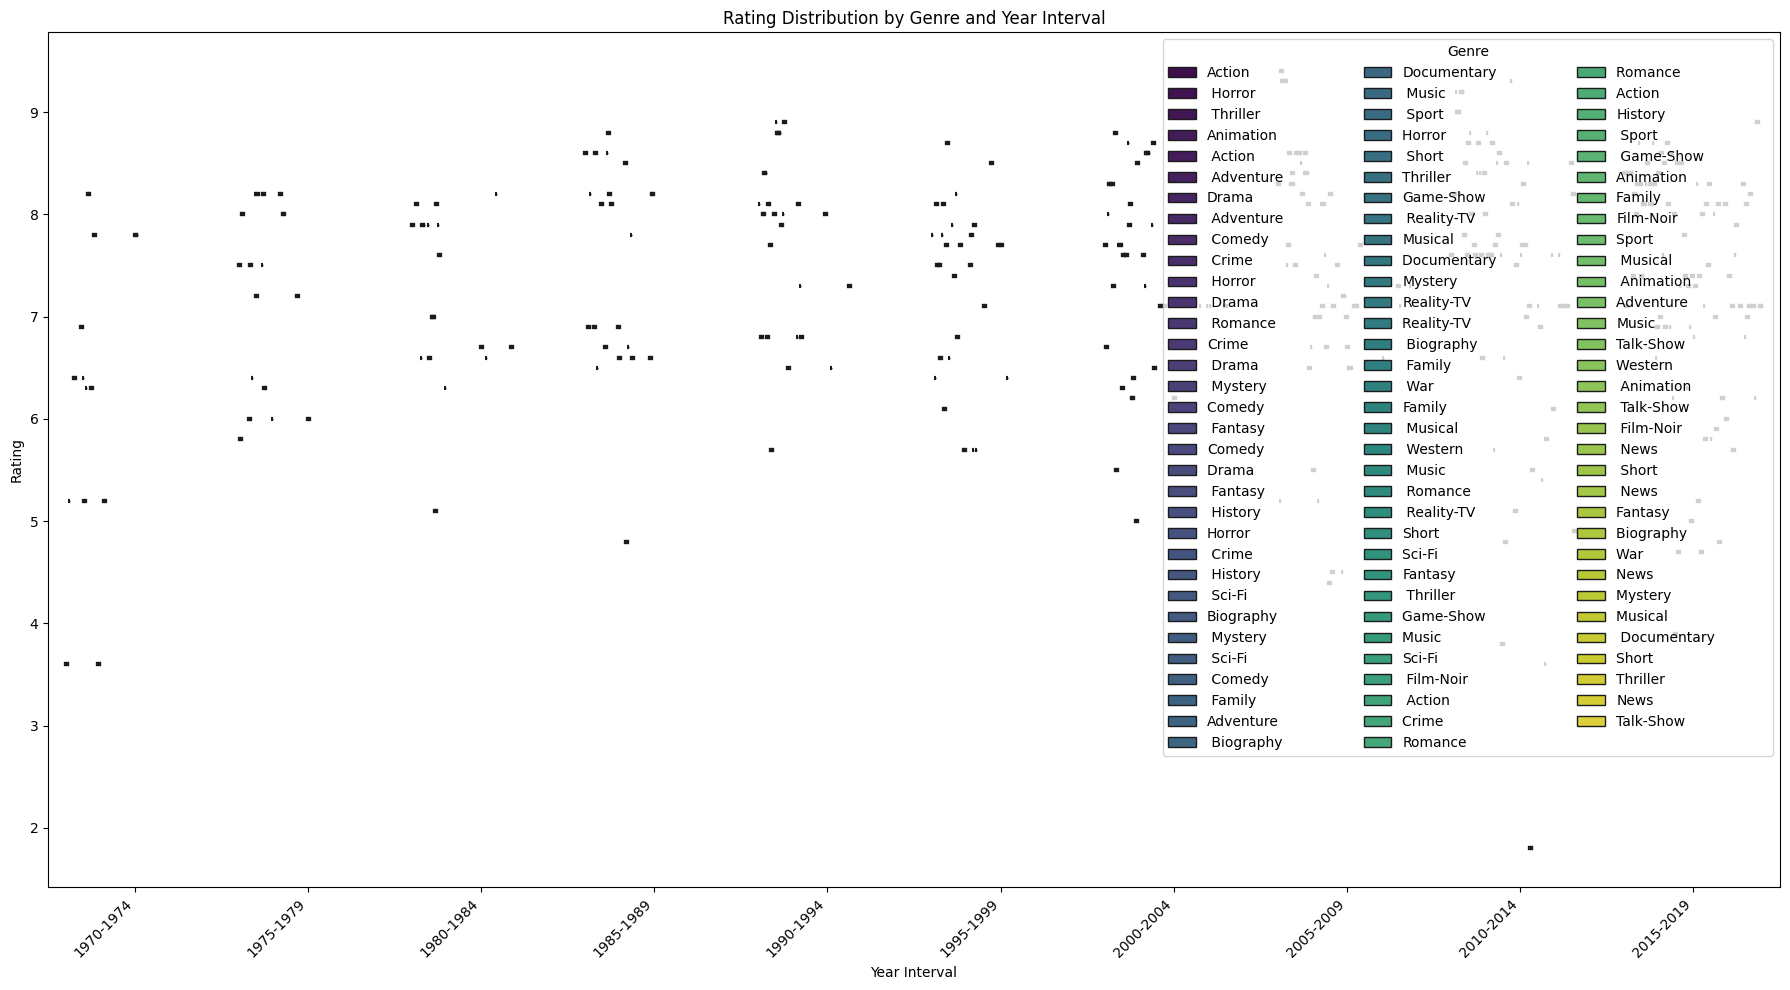

In [81]:
exploded_genres.reset_index(drop=True, inplace=True)  # Reset the index
fig, ax = plt.subplots(figsize=(18, 10)) # define ax here
sns.boxplot(
    x='Year_Group',
    y='RATING',
    hue='GENRE',
    data=exploded_genres,
    palette='viridis',
    showfliers=False,  # Remove this if you want to see outliers
    ax=ax #assign ax here
)
plt.title('Rating Distribution by Genre and Year Interval')
plt.xlabel('Year Interval')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', loc='upper right', ncol=3)  # Adjust ncol as needed

# Increase the size of the dots
for line in ax.lines:
    line.set_linewidth(3)  # Adjust the value as needed

plt.tight_layout()
plt.show()

In [88]:
exploded_genres = cds.explode('GENRE')
exploded_genres = exploded_genres[exploded_genres['GENRE'] != '']
exploded_genres = exploded_genres.dropna(subset=['GENRE'])

fig = px.scatter(
    exploded_genres,
    x="VOTES",
    y="RATING",
    size="RunTime",
    color="GENRE",
    hover_name="MOVIES",  # Display movie title on hover
    title="Movie Ratings vs. Votes",
    labels={"VOTES": "Number of Votes", "RATING": "Movie Rating", "RunTime": "Runtime (minutes)"},

)

fig.update_layout( width = 1600 , height = 800 )

fig.show()

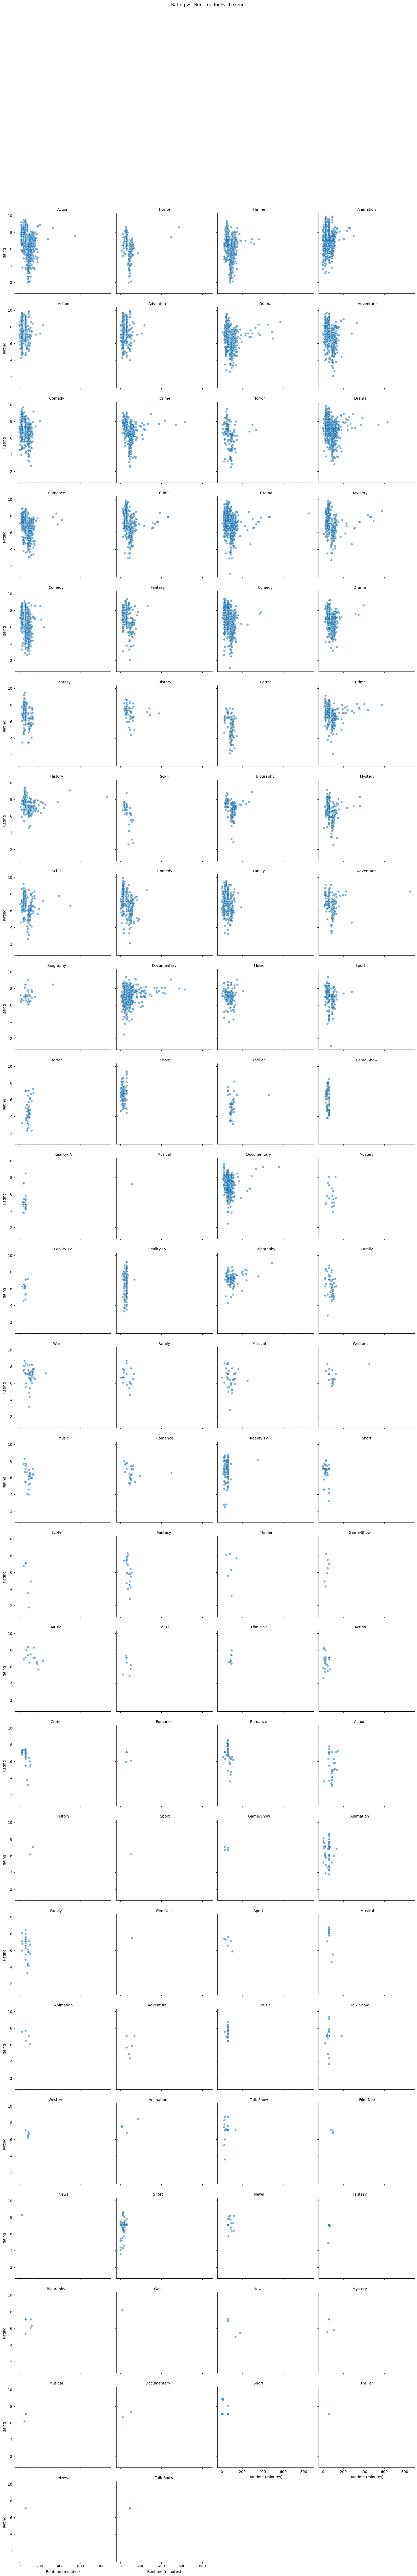

In [89]:
g = sns.FacetGrid(exploded_genres, col="GENRE", col_wrap=4, height=4)  # Adjust col_wrap and height as needed
g.map(sns.scatterplot, "RunTime", "RATING", alpha=0.6)  # alpha for transparency
g.set_axis_labels("Runtime (minutes)", "Rating")
g.set_titles(col_template="{col_name}")  # Set title for each facet
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rating vs. Runtime for Each Genre')  # Set overall title
plt.show()